# The Waal: Data analysis

## Purpose

In this exercise, we consider a 90 km long stretch of the River Waal. The River Waal is the main branch of the Rhine in the Netherlands and runs from the bifurcation of Pannerden to the Merwede bifurcation at Werkendam (see image below). Actually the stretch of river between Woudrichem and the bifurcation at Werkendam is called the River Boven Merwede, but for this exercise, we will simply call it the River Waal.  
<br>
<img src="./figures/river_waal.png" alt="Drawing" style="float: left" style="width: 800px;"/> 
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

The purpose of this section of the excercise if to determine the boundary conditions required for your numerical model (next exercise). 

You have received three column seperated value (csv) files containing water level measurements at the up- and downstream locations as well as discharge values at the upstream location.

## Step 1
Create time series plots for each year for the up- and downstream waterlevels as well as the discharge for each year.</li>
Here we list the correspondence between filename and river station: <br>

    PANNDSKP -  Pannerden <br>
    NIJMGHVN -  Nijmegen <br>
    WERKDBTN -  Werkendam <br>
    ZALTBML  -  Zaltbommel. <br>
    
This step has been prepared for you to save some time for the rest of the exercise. 
    
    

<!--- 
The table below lists the dates at which the largest discharges occured during the last two decades. 
<div style="font-size: 10px">



|date                    |discharge       | rank               |Recurrency interval (years)| Annual exceedence Probability
|------------------------------|-------------------|-----------------------|-------------------|---------------------|				
2000-01-01 01:00:00 |	4304.50 |	9.0|	2.233645|	0.447699|
2001-03-27 06:00:00	|5732.60|	2.0|	12.256410|	0.081590|
2002-03-01 22:00:00	|5404.00|	4.0|	5.370787|	0.186192|
2003-01-06 19:00:00	|6177.20|	1.0|	34.142857|	0.029289|
2004-01-18 19:00:00	|4484.00|	6.0|	3.438849|	0.290795|
2005-02-17 05:00:00	|3729.00|	13.0|	1.522293|	0.656904|
2006-03-14 09:00:00	|3893.00|	12.0|	1.653979|	0.604603|
2007-03-06 11:00:00	|4108.00|	10.0|	2.000000|	0.500000|
2008-03-25 10:00:00	|3016.00|	17.0|	1.154589|	0.866109|
2009-03-14 11:00:00	|2983.00|	18.0|	1.088838|	0.918410|
2010-12-13 19:00:00	|3936.00|	11.0|	1.810606|	0.552301|
2011-01-16 21:00:00	|5493.00|	3.0|	7.468750|	0.133891|
2012-01-09 19:00:00	|4471.00|	7.0|	2.914634|	0.343096|
2013-01-01 00:30:00	|4330.74|	8.0|	2.529101|	0.395397|
2014-12-23 14:10:00	|2242.46|	19.0|	1.030172|	0.970711|
2015-01-14 17:50:00	|3072.09|	16.0|	1.228792|	0.813808|
2016-02-13 13:10:00	|3491.62|	14.0|	1.410029|	0.709205|
2017-12-17 21:10:00	|3356.87|	15.0|	1.313187|	0.761506|
2018-01-09 23:30:00	|4867.00|	5.0|	4.192982|	0.238494|
</div >

The probability of exceedance $P_e$ that one or more floods occurring during any period will exceed a given flood threshhold can be expressed, using the binomial distribution as
$$P_e = 1-\left[1-(\frac{1}{T})\right]^n$$
where $T$ is the threshhold return period (e.g. 100-yr, 50-yr etc.), and $n$ is the number of years in the period. The probability of exceedance $P_e$ is also described as the hydrologic risk of failure. --> 

## Step 2
For both the up and downstream locations, plot graphs for water level vs discharge. Compare these graphs and try to explain the difference in shape.
## Step 3
Plot histograms for the discharge measurements with 10 bins for both the discharge and the water levels. Which values would you consider when designing dikes along the river? 
## Step 4
The dike height you have derived is related to a flood with a certain frequency. This is expressed a one in $x$ year flood. For the value you use, what is the expected return time of the flood? </li>
## Step 5
At the time of Room for the Rivers, the dikes were designed for floods with a return time of 1250 years. How would you go about estimating these discharge and water levels? </li> 




For this exercise you may find it useful to access the online documentation 
[Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot), 
[Pandas](http://pandas.pydata.org/pandas-docs/stable/user_guide/index.html), 
[Numpy](https://docs.scipy.org/doc/numpy-1.14.1/genindex.html).


If you want to use the capabilities of Pandas: <br>
Note that the frequency of the observations may vary per station or per parameter. [You can use the resample function of pandas to deal with this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html).<br>
You also can use [the Pandas' merge function](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html). To join different dataframes. 

## Step 1 (answer)

In [1]:
# Load libraries and set paths
"""import all packages and set path to the measurement files"""
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import os
import datetime

# This line must be here!
%matplotlib inline  

path_to_data = os.path.abspath(os.path.join(os.path.dirname('__file__'),'..','water_level_data'))

In [2]:
# Get the water level data from the Pannerdensche kop
"""Upstream water level: Pannerdenschekop"""
df_read_upstream_WL = pd.read_csv(os.path.join(path_to_data,'water_level_PANNDSKP.csv'))
df_wl_up = pd.DataFrame()
df_wl_up['date'] =  df_read_upstream_WL['t']
df_wl_up['date'] = df_wl_up['date'].astype(str).str[:-6]
df_wl_up['waterlevel_upstream'] = df_read_upstream_WL['Meetwaarde.Waarde_Numeriek']
df_wl_up.index = pd.to_datetime(df_wl_up['date'], format='%Y-%m-%d %H:%M:%S')
df_wl_up = df_wl_up.drop('date', axis=1)


In [3]:
# Get the discharge data at the Pannerdensche Kop
"""Upstream discharge: Pannerdenschekop"""
df_read_upstream_Q = pd.read_csv(os.path.join(path_to_data,'debiet_PANNDSKP.csv'), low_memory=False)
df_Q_up = pd.DataFrame()
df_Q_up['date'] =  df_read_upstream_Q['t']
df_Q_up['date'] = df_Q_up['date'].astype(str).str[:-6]
df_Q_up['discharge'] = df_read_upstream_Q['Meetwaarde.Waarde_Numeriek']
df_Q_up.index = pd.to_datetime(df_Q_up['date'], format='%Y-%m-%d %H:%M:%S')
df_Q_up = df_Q_up.drop('date', axis=1)

In [4]:
# Hint: Note that the measurements were made in a different timescale. How can we solve this? Hint: use resampling ()
"""Upstream water level: Werkendam"""
df_read_downstream_WL = pd.read_csv(os.path.join(path_to_data,'water_level_WERKDBTN.csv'), low_memory=False)
df_wl_down = pd.DataFrame()
df_wl_down['date'] =  df_read_downstream_WL['t']
df_wl_down['date'] = df_wl_down['date'].astype(str).str[:-6]
df_wl_down['waterlevel_downstream'] = df_read_downstream_WL['Meetwaarde.Waarde_Numeriek']
df_wl_down.index = pd.to_datetime(df_wl_down['date'], format='%Y-%m-%d %H:%M:%S')
df_wl_down = df_wl_down.drop('date', axis=1)

df_wl_down_hourly = df_wl_down.resample('H').mean()
df_wl_up_hourly = df_wl_up.resample('H').mean()
df_Q_up_hourly = df_Q_up.resample('H').mean()

In [5]:
# These lines should be here to explain the merge.
# or put this link: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
df_combined_tmp = pd.merge(df_wl_down_hourly,df_wl_up_hourly, how='inner', left_index=True, right_index=True)
df_combined = pd.merge(df_combined_tmp,df_Q_up_hourly, how='inner', left_index=True, right_index=True)

In [6]:
# Print an overview of the data frame
df_combined.head()

,waterlevel_downstream,waterlevel_upstream,discharge
date,,,
2000-01-01 01:00:00,182.833333,1365.0,4304.5
2000-01-01 02:00:00,184.833333,1364.0,4293.8
2000-01-01 03:00:00,183.333333,1364.0,4293.8
2000-01-01 04:00:00,180.000000,1362.0,4272.4
2000-01-01 05:00:00,177.166667,1361.0,4261.7


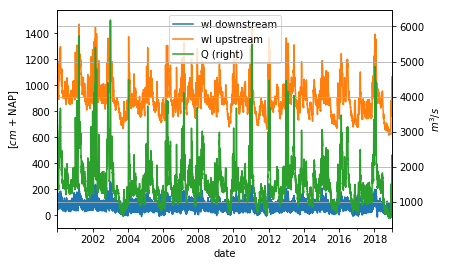

In [7]:
"""Create time series plot"""
ax = df_combined.plot(y='waterlevel_downstream', label='wl downstream')
df_combined.plot(y='waterlevel_upstream',label='wl upstream', ax = ax)
plt.ylabel('[$cm$ + NAP]')
df_combined.plot(y='discharge', label='Q', secondary_y=True, ax = ax)
plt.ylabel('$m^3/s$')
plt.grid()

plt.savefig('Timeseries_Q_wl.png')

## Step 2 (answer)

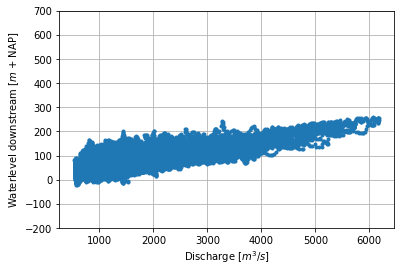

In [17]:
"""Plotting Discharge upstream (Q) vs Waterlevel downstream"""
Q = np.array(df_combined['discharge'].values)
wl_downstream = np.array(df_combined['waterlevel_downstream'])
wl_upstream = np.array(df_combined['waterlevel_upstream'])
plt.figure()
plt.plot(Q,wl_downstream,'.')
plt.xlabel('Discharge [$m^3/s$]')
plt.ylabel('Waterlevel downstream [$m$ + NAP]')
plt.ylim(-200, 700)
plt.grid()


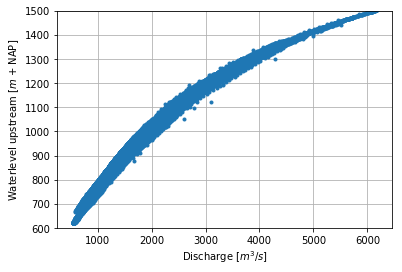

In [14]:
"""Plotting Discharge upstream (Q) vs Waterlevel upstream"""

plt.figure()
plt.plot(Q,wl_upstream,'.')
plt.xlabel('Discharge [$m^3/s$]')
plt.ylabel('Waterlevel upstream [$m$ + NAP]')
plt.ylim(600, 1500)
plt.grid()

The larger spread in the waterlevel at the downstream boundary can be related to the time which is needed for a flood wave to pass to the downstream boundary, and the influence of the tidal water motion. At the upstream boundary the spread is less large. The spread which is seen is due to the flood wave shape, where the waterlevel generally rises faster before the flood, than after the flood.

## Step 3 (answer)

<Figure size 2160x8640 with 0 Axes>

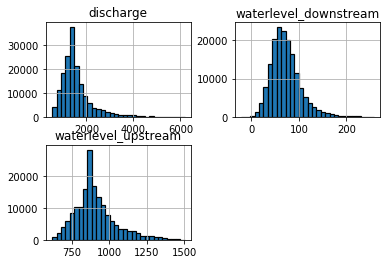

In [18]:
plt.figure(figsize=(30,120))
bins = 10
df_combined.hist(bins=30, edgecolor='black', linewidth=1.2)
plt.show()

## Step 4 + 5 (answer)

In [19]:
"""Determine return periods and AEP according to Gringorten formula: 
http://www.whycos.org/fck_editor/upload/File/Pacific-HYCOS/Surface_Waters/Estimating_Flood_Frequency.pdf"""

df_Q_up_yearly_flood = df_Q_up.resample('Y').max()
idx = df_Q_up.resample('Y').agg({'discharge': np.argmax})
df_flood = df_Q_up.loc[idx.discharge]
number_of_years = len(df_flood)
df_flood['Rank'] = df_flood['discharge'].rank(method='dense', ascending=False)
df_flood['Recurrency interval (years)'] = (number_of_years+0.12)/(df_flood['Rank'] - 0.44)
df_flood['Annual exceedence probability'] = 1/(df_flood['Recurrency interval (years)'])


C:\Users\ottevan\AppData\Local\Continuum\anaconda3\envs\openday\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [20]:
"""boundary values"""
waterlevel_downstream = df_wl_down.loc['2003-01-06 19:00:00']
waterlevel_upstream = df_wl_up.loc['2003-01-06 19:00:00']
discharge = df_flood['discharge'].values
returnval = df_flood['Recurrency interval (years)'].values


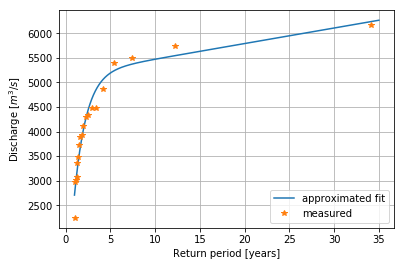

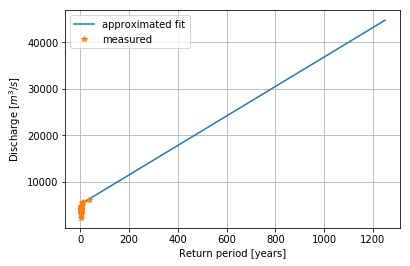

In [21]:
# plt.plot(returnval, discharge,'*')
from scipy.optimize import curve_fit
def func(x, a, b, c, d):
    return a + b*x - c*np.exp(-d*x)


zipped_data = sorted(zip(returnval, discharge))
xxx = [x for x,_ in zipped_data]
yyy = [y for _,y in zipped_data]

xxx = np.array(xxx)
yyy = np.array(yyy)
p0 = [100, 50, 500, 0.5]
popt, pcov = curve_fit(func, xxx, yyy, p0=p0)

xxx1 = np.linspace(1,35,5000)
plt.plot(xxx1, func(xxx1, *popt), label = 'approximated fit')
plt.plot(xxx,yyy,'*',label='measured')
plt.xlabel('Return period [years]')
plt.ylabel('Discharge [$m^3/s$]')
plt.legend()
plt.grid()
#plot extrapolation
plt.figure()
xxx1 = np.linspace(1,1250,50000)
plt.plot(xxx1, func(xxx1, *popt), label = 'approximated fit')
plt.plot(xxx,yyy,'*',label='measured')
plt.xlabel('Return period [years]')
plt.ylabel('Discharge [$m^3/s$]')
plt.legend()
plt.grid()



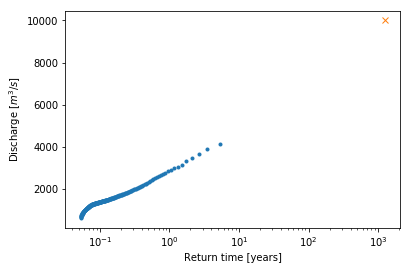

In [22]:
percentiles=np.arange(0.5,99.5,0.5)
alltime = df_combined.index[-1] - df_combined.index[0]
periodyears = alltime.total_seconds()/60/60/24/365.25

plt.semilogx(1/((100-percentiles)/100*(periodyears)),np.nanpercentile(df_combined['discharge'],percentiles),'.')
plt.plot(1250,10000,'x')  # plot the value used in practice

plt.xlabel('Return time [years]')
plt.ylabel('Discharge [$m^3/s$]')
plt.show()

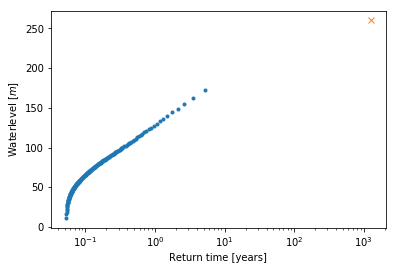

In [24]:
percentiles=np.arange(0.5,99.5,0.5)
alltime = df_combined.index[-1] - df_combined.index[0]
periodyears = alltime.total_seconds()/60/60/24/365.25

plt.semilogx(1/((100-percentiles)/100*(periodyears)),np.nanpercentile(df_combined['waterlevel_downstream'],percentiles),'.')
plt.plot(1250,260,'x')  # plot the value used in practice

plt.xlabel('Return time [years]')
plt.ylabel('Waterlevel [$m$]')
plt.show()

## Extra - development of water level over time

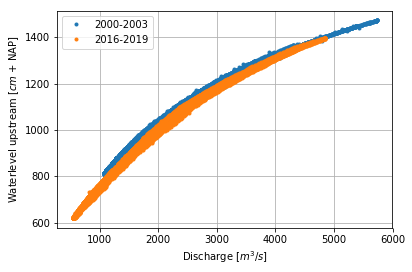

In [27]:
plt.figure()
plt.plot(df_combined['discharge'][df_combined.index<datetime.datetime(2003,1,1)],df_combined['waterlevel_upstream'][df_combined.index<datetime.datetime(2003,1,1)],'.')
plt.plot(df_combined['discharge'][df_combined.index>datetime.datetime(2016,1,1)],df_combined['waterlevel_upstream'][df_combined.index>datetime.datetime(2016,1,1)],'.')
plt.xlabel('Discharge [$m^3/s$]')
plt.ylabel('Waterlevel upstream [$cm$ + NAP]')
plt.legend(['2000-2003','2016-2019'])
plt.grid()


The above figure shows that for the same discharge the water level has reduced over time.